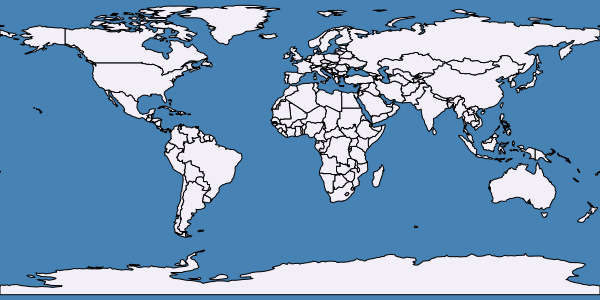

In [3]:
import mapnik
from IPython.display import Image, display

# Instantiate a map object with given width, height and spatial reference system
m = mapnik.Map(600,300,"+proj=latlong +datum=WGS84")
# Set background colour to 'steelblue'.
m.background = mapnik.Color('steelblue')
# Now lets create a style and add it to the Map.
s = mapnik.Style()
# A Style can have one or more rules. A rule consists of a filter, min/max scale
# demoninators and 1..N Symbolizers. If you don't specify filter and scale denominators
# you get default values :
#   Filter =  'ALL' filter (meaning symbolizer(s) will be applied to all features)
#   MinScaleDenominator = 0
#   MaxScaleDenominator = INF
# Lets keep things simple and use default value, but to create a map we
# we still must provide at least one Symbolizer. Here we  want to fill countries polygons with
# greyish colour and draw outlines with a bit darker stroke.


r=mapnik.Rule()
poly=mapnik.PolygonSymbolizer()
poly.fill=mapnik.Color('#f2eff9')


l = mapnik.LineSymbolizer()




r.symbols.append(poly)
r.symbols.append(l)
s.rules.append(r)
# Here we have to add our style to the Map, giving it a name.
m.append_style('My Style',s)


# Here we instantiate our data layer, first by giving it a name and srs (proj4 projections string), and then by giving it a datasource.
lyr = mapnik.Layer('world',"+proj=latlong +datum=WGS84")
# Then provide the full filesystem path to a shapefile in WGS84 or EPSG 4326 projection without the .shp extension
# A sample shapefile can be downloaded from http://mapnik-utils.googlecode.com/svn/data/world_borders.zip
lyr.datasource = mapnik.Shapefile(file='./ne_110m_admin_0_countries.shp')
lyr.styles.append('My Style')


m.layers.append(lyr)
m.zoom_to_box(lyr.envelope())
mapnik.render_to_file(m,'world.png', 'png')
display(Image(filename='world.png'))